In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('data.csv')  # read csv
X = data.iloc[:, :25]  # X feature

### **J_sc**

Best Parameters for jsc: {'criterion': 'absolute_error', 'max_depth': 20, 'max_features': None, 'min_samples_split': 7}
MSE: 5.5978, RMSE: 2.3660, R²: 0.8339, MAE:1.053951612903226
Params: {'criterion': 'absolute_error', 'max_depth': 200, 'max_features': None, 'min_samples_split': 7}
Mean Test R²: 0.8198235856469982
Mean Test Neg MSE: -7.089707725627413
Std Test R²: 0.0467643401868075
Std Test Neg MSE: 1.7255416634364324
--------------------------------------------------
Params: {'criterion': 'absolute_error', 'max_depth': 100, 'max_features': None, 'min_samples_split': 7}
Mean Test R²: 0.8198235856469982
Mean Test Neg MSE: -7.089707725627413
Std Test R²: 0.0467643401868075
Std Test Neg MSE: 1.7255416634364324
--------------------------------------------------
Params: {'criterion': 'absolute_error', 'max_depth': 50, 'max_features': None, 'min_samples_split': 7}
Mean Test R²: 0.8198235856469982
Mean Test Neg MSE: -7.089707725627413
Std Test R²: 0.0467643401868075
Std Test Neg MSE: 1.725

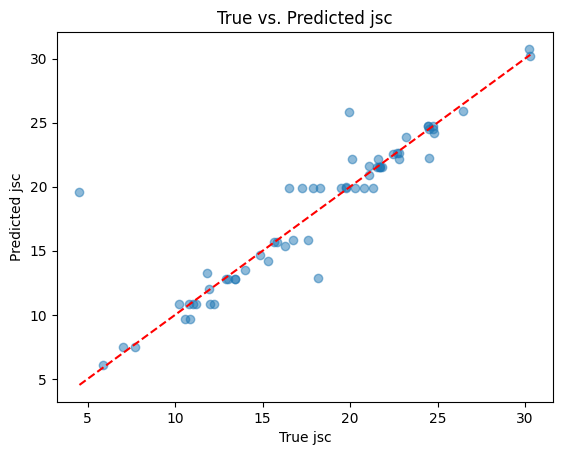

In [11]:
# 1. data split
X_jsc = data.iloc[:, :25]  # X feature
y_jsc = data['Jsc']  # target feature
X_jsc_train, X_jsc_test, y_jsc_train, y_jsc_test = train_test_split(X_jsc, y_jsc, test_size=0.1, random_state=43)

# 2. DT model
# parameter grid
param_grid_jsc = {
    'max_depth': [20, 50, 100, 200],
    'min_samples_split': [7, 10, 13,15],
    'max_features': [None],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'] 
}

# Initialize Desicion_tree regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# 3. Grid searching for jsc
grid_jsc_search = GridSearchCV(
    estimator=dt_reg,
    param_grid=param_grid_jsc,
    cv=5,
    scoring= {'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R ²
    n_jobs=-1
)

grid_jsc_search.fit(X_jsc_train, y_jsc_train)

# Best model for jsc
best_dt_reg_jsc = grid_jsc_search.best_estimator_

# 4. Model evaluation on test set for jsc
y_jsc_pred = best_dt_reg_jsc.predict(X_jsc_test)
mse_jsc = mean_squared_error(y_jsc_test, y_jsc_pred)
rmse_jsc = mse_jsc**0.5
mae_jsc = mean_absolute_error(y_jsc_test, y_jsc_pred)
r2_jsc = r2_score(y_jsc_test, y_jsc_pred)

print(f"Best Parameters for jsc: {grid_jsc_search.best_params_}")
print(f"MSE: {mse_jsc:.4f}, RMSE: {rmse_jsc:.4f}, R²: {r2_jsc:.4f}, MAE:{mae_jsc}")

# 5. Get cross-validation results for jsc
cv_jsc_results_df = pd.DataFrame(grid_jsc_search.cv_results_)
cv_jsc_results_df = cv_jsc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for jsc
best_cv_jsc_score_r2 = grid_jsc_search.best_score_
best_cv_jsc_score_neg_mse = -grid_jsc_search.cv_results_['mean_test_neg_mse'][grid_jsc_search.best_index_]

for index, row in cv_jsc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for jsc: {best_cv_jsc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for jsc: {best_cv_jsc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for jsc: {grid_jsc_search.best_params_}")


# 6. Visualization for jsc
plt.scatter(y_jsc_test, y_jsc_pred, alpha=0.5)
plt.plot([y_jsc_test.min(), y_jsc_test.max()], [y_jsc_test.min(), y_jsc_test.max()], 'r--')
plt.xlabel('True jsc')
plt.ylabel('Predicted jsc')
plt.title('True vs. Predicted jsc')
plt.show()

### **V_oc**

Best Parameters for voc: {'criterion': 'poisson', 'max_depth': 20, 'max_features': None, 'min_samples_split': 7}
MSE: 0.0162, RMSE: 0.1274, R²: 0.8443, MAE:0.06835331499674395
Params: {'criterion': 'poisson', 'max_depth': 200, 'max_features': None, 'min_samples_split': 7}
Mean Test R²: 0.9025257453428303
Mean Test Neg MSE: -0.008729184273509584
Std Test R²: 0.020543170243070043
Std Test Neg MSE: 0.001941100529046186
--------------------------------------------------
Params: {'criterion': 'poisson', 'max_depth': 100, 'max_features': None, 'min_samples_split': 7}
Mean Test R²: 0.9025257453428303
Mean Test Neg MSE: -0.008729184273509584
Std Test R²: 0.020543170243070043
Std Test Neg MSE: 0.001941100529046186
--------------------------------------------------
Params: {'criterion': 'poisson', 'max_depth': 50, 'max_features': None, 'min_samples_split': 7}
Mean Test R²: 0.9025257453428303
Mean Test Neg MSE: -0.008729184273509584
Std Test R²: 0.020543170243070043
Std Test Neg MSE: 0.0019411005

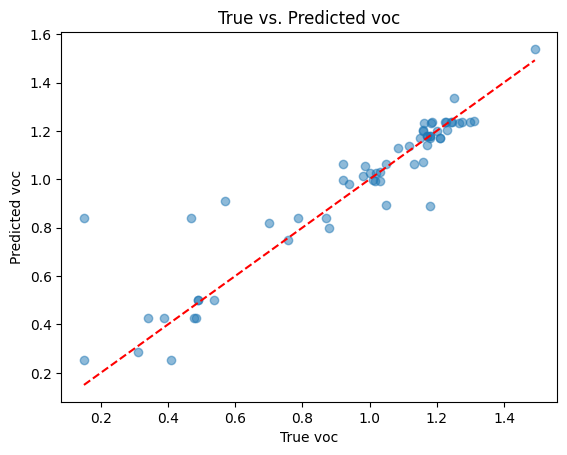

In [12]:
# 1. data split
X_voc = data.iloc[:, :25]  # X feature
y_voc = data['Voc']  # target feature
X_voc_train, X_voc_test, y_voc_train, y_voc_test = train_test_split(X_voc, y_voc, test_size=0.1, random_state=42)

# 2. DT model
# parameter grid
param_grid_voc = {
    'max_depth': [20, 50, 100, 200],
    'min_samples_split': [7, 10, 13, 15],
    'max_features': [None],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

# Initialize Decision_tree regressor
dt_reg_voc = DecisionTreeRegressor(random_state=42)

# 3. Grid searching for voc
grid_voc_search = GridSearchCV(
    estimator=dt_reg_voc,
    param_grid=param_grid_voc,
    cv=5,
    scoring={'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R²
    n_jobs=-1
)

grid_voc_search.fit(X_voc_train, y_voc_train)

# Best model for voc
best_dt_reg_voc = grid_voc_search.best_estimator_

# 4. Model evaluation on test set for voc
y_voc_pred = best_dt_reg_voc.predict(X_voc_test)
mse_voc = mean_squared_error(y_voc_test, y_voc_pred)
rmse_voc = mse_voc**0.5
mae_voc = mean_absolute_error(y_voc_test, y_voc_pred)
r2_voc = r2_score(y_voc_test, y_voc_pred)

print(f"Best Parameters for voc: {grid_voc_search.best_params_}")
print(f"MSE: {mse_voc:.4f}, RMSE: {rmse_voc:.4f}, R²: {r2_voc:.4f}, MAE:{mae_voc}")

# 5. Get cross-validation results for voc
cv_voc_results_df = pd.DataFrame(grid_voc_search.cv_results_)
cv_voc_results_df = cv_voc_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for voc
best_cv_voc_score_r2 = grid_voc_search.best_score_
best_cv_voc_score_neg_mse = -grid_voc_search.cv_results_['mean_test_neg_mse'][grid_voc_search.best_index_]

for index, row in cv_voc_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for voc: {best_cv_voc_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for voc: {best_cv_voc_score_neg_mse}")
print(f"Best parameters via GridSearchCV for voc: {grid_voc_search.best_params_}")

# 6. Visualization for voc
plt.scatter(y_voc_test, y_voc_pred, alpha=0.5)
plt.plot([y_voc_test.min(), y_voc_test.max()], [y_voc_test.min(), y_voc_test.max()], 'r--')
plt.xlabel('True voc')
plt.ylabel('Predicted voc')
plt.title('True vs. Predicted voc')
plt.show()

### **FF**

Best Parameters for ff: {'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5}
MSE: 0.0047, RMSE: 0.0687, R²: 0.4656, MAE:0.04408116064471604
Params: {'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Test R²: 0.5946841601454069
Mean Test Neg MSE: -0.0038316566501237154
Std Test R²: 0.12556709326011403
Std Test Neg MSE: 0.0010711046393094424
--------------------------------------------------
Params: {'max_depth': 30, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Test R²: 0.5946841601454069
Mean Test Neg MSE: -0.0038316566501237154
Std Test R²: 0.12556709326011403
Std Test Neg MSE: 0.0010711046393094424
--------------------------------------------------
Params: {'max_depth': 50, 'max_features': 'log2', 'max_leaf_nodes'

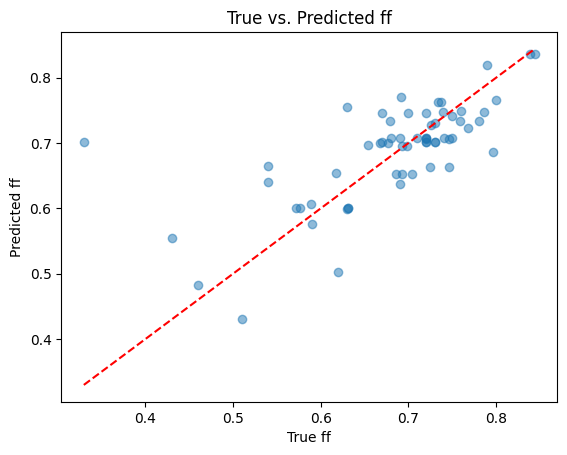

In [13]:
# 1. data split
X_ff = data.iloc[:, :25]  # X feature
y_ff = data['FF']  # target feature
X_ff_train, X_ff_test, y_ff_train, y_ff_test = train_test_split(X_ff, y_ff, test_size=0.1, random_state=42)

# 2. DT model
# parameter grid
param_grid_ff = {
    'max_depth': [None, 10,  30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}
# Initialize Decision_tree regressor
dt_reg_ff = DecisionTreeRegressor(random_state=42)

# 3. Grid searching for ff
grid_ff_search = GridSearchCV(
    estimator=dt_reg_ff,
    param_grid=param_grid_ff,
    cv=5,
    scoring={'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R²
    n_jobs=-1
)

grid_ff_search.fit(X_ff_train, y_ff_train)

# Best model for ff
best_dt_reg_ff = grid_ff_search.best_estimator_

# 4. Model evaluation on test set for ff
y_ff_pred = best_dt_reg_ff.predict(X_ff_test)
mse_ff = mean_squared_error(y_ff_test, y_ff_pred)
rmse_ff = mse_ff**0.5
mae_ff = mean_absolute_error(y_ff_test, y_ff_pred)
r2_ff = r2_score(y_ff_test, y_ff_pred)

print(f"Best Parameters for ff: {grid_ff_search.best_params_}")
print(f"MSE: {mse_ff:.4f}, RMSE: {rmse_ff:.4f}, R²: {r2_ff:.4f}, MAE:{mae_ff}")

# 5. Get cross-validation results for ff
cv_ff_results_df = pd.DataFrame(grid_ff_search.cv_results_)
cv_ff_results_df = cv_ff_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for ff
best_cv_ff_score_r2 = grid_ff_search.best_score_
best_cv_ff_score_neg_mse = -grid_ff_search.cv_results_['mean_test_neg_mse'][grid_ff_search.best_index_]

for index, row in cv_ff_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for ff: {best_cv_ff_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for ff: {best_cv_ff_score_neg_mse}")
print(f"Best parameters via GridSearchCV for ff: {grid_ff_search.best_params_}")

# 6. Visualization for ff
plt.scatter(y_ff_test, y_ff_pred, alpha=0.5)
plt.plot([y_ff_test.min(), y_ff_test.max()], [y_ff_test.min(), y_ff_test.max()], 'r--')
plt.xlabel('True ff')
plt.ylabel('Predicted ff')
plt.title('True vs. Predicted ff')
plt.show()

### **PCE**

Best Parameters for pce: {'criterion': 'poisson', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2}
MSE: 5.1297, RMSE: 2.2649, MAE:1.540048, R²: 0.8742 
Params: {'criterion': 'poisson', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2}
Mean Test R²: 0.8358145198678472
Mean Test Neg MSE: -5.808197028118032
Std Test R²: 0.04812789983746464
Std Test Neg MSE: 1.6789118560974783
--------------------------------------------------
Params: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8}
Mean Test R²: 0.8340639087210813
Mean Test Neg MSE: -5.888156933706357
Std Test R²: 0.051619368352790254
Std Test Neg MSE: 1.831607192565834
--------------------------------------------------
Params: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8}
Mean Test R²: 0.8340639087210813
Mean Test Neg MSE: -5.888156933706357
Std Test R²: 0.051619368352790254
Std Test Neg MSE: 1.831607192565834
---------

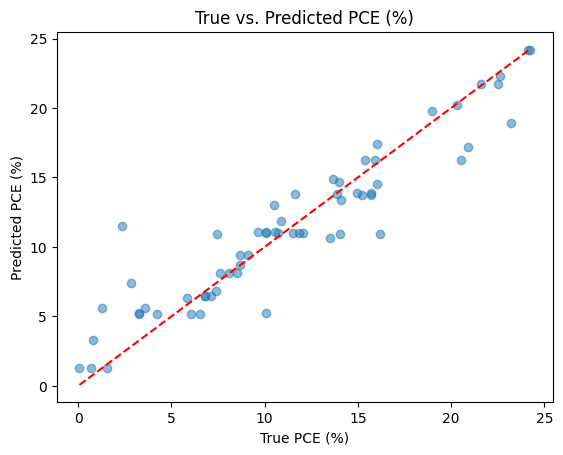

In [14]:
# 1. data split
X_pce = data.iloc[:, :25]  # X feature
y_pce = data['PCE']  # target feature
X_pce_train, X_pce_test, y_pce_train, y_pce_test = train_test_split(X_pce, y_pce, test_size=0.1, random_state=42)

# 2. DT model
# parameter grid
param_grid_pce = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

# Initialize Decision_tree regressor
dt_reg_pce = DecisionTreeRegressor(random_state=42)

# 3. Grid searching for pce
grid_pce_search = GridSearchCV(
    estimator=dt_reg_pce,
    param_grid=param_grid_pce,
    cv=5,
    scoring={'r2': 'r2', 'neg_mse': 'neg_mean_squared_error'},  # two standard
    refit='r2',  # Select the best model based on R²
    n_jobs=-1
)

grid_pce_search.fit(X_pce_train, y_pce_train)

# Best model for pce
best_dt_reg_pce = grid_pce_search.best_estimator_

# 4. Model evaluation on test set for pce
y_pce_pred = best_dt_reg_pce.predict(X_pce_test)
mse_pce = mean_squared_error(y_pce_test, y_pce_pred)
rmse_pce = mse_pce**0.5
mae_pce = mean_absolute_error(y_pce_test, y_pce_pred)
r2_pce = r2_score(y_pce_test, y_pce_pred)

print(f"Best Parameters for pce: {grid_pce_search.best_params_}")
print(f"MSE: {mse_pce:.4f}, RMSE: {rmse_pce:.4f}, MAE:{mae_pce:4f}, R²: {r2_pce:.4f} ")

# 5. Get cross-validation results for pce
cv_pce_results_df = pd.DataFrame(grid_pce_search.cv_results_)
cv_pce_results_df = cv_pce_results_df.sort_values(by='mean_test_r2', ascending=False)  # sort by r^2

# Best CV score for pce
best_cv_pce_score_r2 = grid_pce_search.best_score_
best_cv_pce_score_neg_mse = -grid_pce_search.cv_results_['mean_test_neg_mse'][grid_pce_search.best_index_]

for index, row in cv_pce_results_df.head(10).iterrows():
    print(f"Params: {row['params']}")
    print(f"Mean Test R²: {row['mean_test_r2']}")
    print(f"Mean Test Neg MSE: {row['mean_test_neg_mse']}")
    print(f"Std Test R²: {row['std_test_r2']}")
    print(f"Std Test Neg MSE: {row['std_test_neg_mse']}")
    print("-" * 50)

print(f"Best Cross-Validation R² for pce: {best_cv_pce_score_r2}")
print(f"Best Cross-Validation neg_mean_squared_error for pce: {best_cv_pce_score_neg_mse}")
print(f"Best parameters via GridSearchCV for pce: {grid_pce_search.best_params_}")

# 6. Visualization for pce
plt.scatter(y_pce_test, y_pce_pred, alpha=0.5)
plt.plot([y_pce_test.min(), y_pce_test.max()], [y_pce_test.min(), y_pce_test.max()], 'r--')
plt.xlabel('True PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.title('True vs. Predicted PCE (%)')
plt.show()

In [30]:
pd.options.display.max_rows = None
cv_pce_results_df['mean_test_r2']

1    0.673471
2    0.659212
3    0.643560
4    0.643560
0    0.571150
Name: mean_test_r2, dtype: float64